In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

## 6.1 Programming exercise
### For any real number $x\in R$, the probability density function (PDF) for a univariate Gaussian distribution1 is given by


\begin{align}
        N(x|\mu,\Sigma)= 􏰇\frac{1}{\sqrt{2\pi\sigma^2}}exp(−\frac{(x−\mu)}{2\sigma^2}) 
\end{align}

where $\mu \in R$ is the mean and $\sigma^2 \in R+$ is the variance.



**(a)** Implement a function in Python that take the three arguments (x,μ,σ2) and returns the value of $N (x|\mu, \sigma^2)$.

In [2]:
def gaus_pdf(x,mu,var):
    constant = 1/np.sqrt(2*np.pi*var)
    exponent = np.exp(-((x-mu)**2/(2*var)))
    return constant * exponent

**(b)** Make three individual plots of the PDF for $(μ, σ^2) = (0, 1), (μ, σ^2) = (3, 1)$, and
$(μ, σ^2) = (0, 5)$ and for $x ∈ [−5, 5]$ using the implemented function above.

In [3]:
X = np.linspace(-5,5,100)
dist_1 = np.array([gaus_pdf(x_i,0,1) for x_i in X])
dist_2= np.array([gaus_pdf(x_i,3,1) for x_i in X])
dist_3= np.array([gaus_pdf(x_i,0,5) for x_i in X])

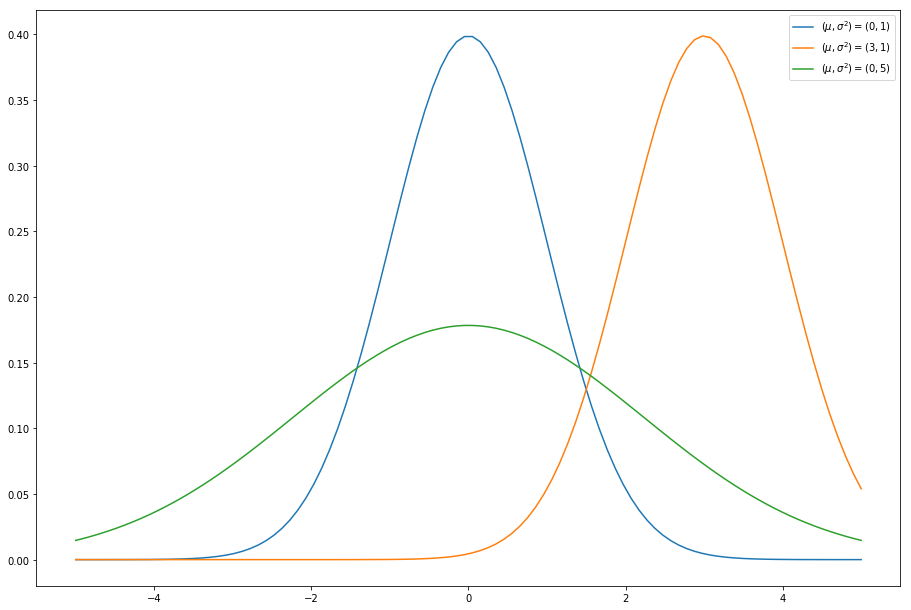

In [4]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
ax.plot(X,dist_1 , label="$(\mu,\sigma^2) = (0,1)$ ")
ax.plot(X,dist_2 , label="$(\mu,\sigma^2) = (3,1)$ ")
ax.plot(X,dist_3 , label="$(\mu,\sigma^2) = (0,5)$ ")
ax.legend()

**(c)** For each of the three setting of $(μ,σ^2)$, draw 10 samples from the Gaussian distri- bution using the function numpy.random.normal. Display these samples as dots along the x-axis of the corresponding plots (i.e. as points with coordinates $(x_i,0)$ where $x_i$ is the value of the i’th sample).

In [5]:
dots_1 = np.array([np.random.normal(0,1) for _ in range(10)])
dots_2 = np.array([np.random.normal(3,1) for _ in range(10)])
dots_3 = np.array([np.random.normal(0,5) for _ in range(10)])

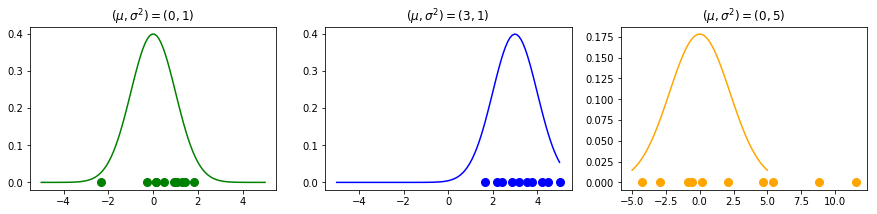

In [6]:
fig = plt.figure(figsize=(15,3))

ax1 = fig.add_subplot(131)
ax1.plot(X,dist_1 , label="$(\mu,\sigma^2) = (0,1)$ ", color = "green")
ax1.plot(dots_1,np.zeros(len(dots_1)), label="$(\mu,\sigma^2) = (0,1)$ ",lw= 0,marker='o', markersize=8,color = "green")
ax1.set_title("$(\mu,\sigma^2) = (0,1)$ ")

ax2 = fig.add_subplot(132)
ax2.plot(X,dist_2 , label="$(\mu,\sigma^2) = (3,1)$ ", color = "blue")
ax2.plot(dots_2,np.zeros(len(dots_1)), label="$(\mu,\sigma^2) = (3,1)$ ",lw= 0,marker='o', markersize=8,color = "blue")
ax2.set_title("$(\mu,\sigma^2) = (3,1)$ ")



ax3 = fig.add_subplot(133)
ax3.plot(X,dist_3 , label="$(\mu,\sigma^2) = (0,5)$ ", color = "orange")
ax3.plot(dots_3,np.zeros(len(dots_1)), label="$(\mu,\sigma^2) = (0,5)$ ",lw= 0,marker='o', markersize=8,color = "orange")
ax3.set_title("$(\mu,\sigma^2) = (0,5)$ ")

plt.show()

**(d)** 
Use the plots to explain the meaning of the parameters μ and σ2.

**Solution:**
$\mu$ descripes the expected vzlue to be drawn from the distribution, where $\sigma^2$ describes how spread out the distribution is around the distribution.

## Exercise W6.2 (math and programming)
For $x \in R^D$ the PDF for a multivariate (D-dimensional) Gaussian distribution is defined as:
\begin{align}
        N(x|\mu,\Sigma)= 􏰇\frac{1}{(2\pi)^D|\Sigma|}exp(−\frac{1}{2}(x−\mu)^T \Sigma^{-1} (x−\mu)) 
\end{align}

where $\mu \in R^D$ is the mean, $\Sigma \in R^{D×D}$ is the covariance matrix, and |Σ| is the determinant of the covariance matrix.
In the bivariate (2-dimensional) case, we have $x = (x_1, x_2)^T$􏰈 ∈ $R^2$, and we can write the parameters as

\begin{align}
         \mu = \begin{pmatrix}  \mu_1 \\ \mu_2 \end{pmatrix} \space \text{and} \space 
         \Sigma = \begin{bmatrix} \sigma^2_1 & p\sigma_1\sigma_2\\
                                  p\sigma_1\sigma_2 & \sigma^2_2\end{bmatrix}
\end{align}

whereσ1,σ2 ∈R+ and ρ∈]−1,1[

**(a)** Show that in the 2D case we have that $\frac{1}{\sqrt{(2\pi)^D|\Sigma|}}=\frac{1}{2\pi \sigma_1 \sigma_2 \sqrt{1-p}} $

**Solution:**

\begin{align}
    \frac{1}{\sqrt{(2\pi)^D|\Sigma|}}&=\frac{1}{2\pi \sigma_1 \sigma_2 \sqrt{1-p}} \\
    &=\frac{1}{\sqrt{(2\pi)^2|\Sigma|}}\\
    &=\frac{1}{2\pi  \sqrt{|\Sigma|}}\\
\end{align}

The determinant of a 2x2 matrix $A = \begin{bmatrix} a & b\\
                                  c & d\end{bmatrix}$ is given by $|A|= ad-bc$ so:
\begin{align}
|\Sigma| &= \sigma_1^2 \sigma^2_2 - ((p\sigma_1 \sigma_2)(p\sigma_1 \sigma_2))\\
&= \sigma_1^2 \sigma^2_2 - p^2 \sigma_1^2 \sigma^2_2\\
&= \sigma_1^2 \sigma^2_2 (1- p^2)\\
\end{align}

Now one can insert the new term for the deternimant of $\Sigma$

\begin{align}
    \frac{1}{\sqrt{(2\pi)^D|\Sigma|}}&=\frac{1}{2\pi \sigma_1 \sigma_2 \sqrt{1-p}} \\
    &=\frac{1}{2\pi  \sqrt{|\Sigma|}}\\
    &=\frac{1}{2\pi  \sqrt{\sigma_1^2 \sigma^2_2 (1- p^2)}}\\
    &=\frac{1}{2\pi \sigma_1 \sigma_2 \sqrt{1-p^2}}\\
\end{align}



**(b)** For the 2D case, implement a Python function that take the following arguments $(x_1, x_2, μ_1, μ_2, σ_1, σ_2, ρ)$ and returns the value of $N (x|μ, Σ)$.

\begin{align}
        N(x|\mu,\Sigma)= 􏰇\frac{1}{(2\pi)^D|\Sigma|}exp(−\frac{1}{2}(x−\mu)^T \Sigma^{-1}(x−\mu)) 
\end{align}

In [7]:
def bi_gauss_pdf(x1,x2,mu1,mu2,var1,var2,rho):
    constant = 1/(2*math.pi*var1*var2*math.sqrt(1-rho))
    x = np.array([x1,x2])
    mu = np.array([mu1,mu2])
    cov = np.array([[var1**2,rho*var1*var2],[rho*var1*var2,var2**2]])
    exponent = math.exp((-0.5*(x-mu))@np.linalg.inv(cov)@(x-mu).reshape(2,1))
    return constant * exponent

**(c)** Make six individual plots of the contours for the PDF where $x ∈ [−3, 3]^2$.
* (μ1,μ2,σ1,σ2,ρ) = (0,0,1,1,0),
* (μ1,μ2,σ1,σ2,ρ) = (1,1,1,1,0),
* (μ1,μ2,σ1,σ2,ρ) = (0,0,1,2,0),
* (μ1,μ2,σ1,σ2,ρ) = (0,0,2,1,0),
* (μ1,μ2,σ1,σ2,ρ) = (0,0,1,1,0.5) and 
* (μ1,μ2,σ1,σ2,ρ)=(0,0,1,1,−0.75).

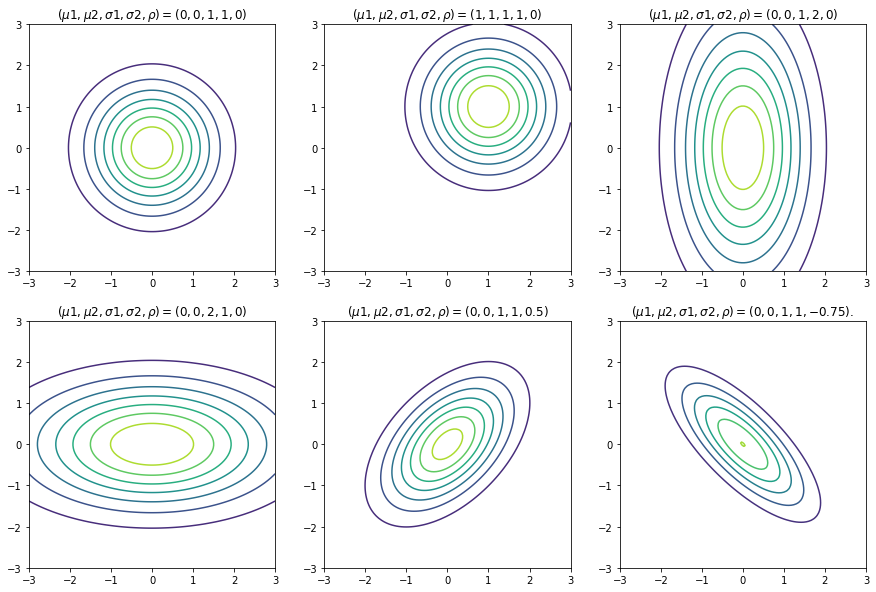

In [8]:
X1, X2 = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
f = np.vectorize(lambda X1,X2,mu1,mu2,var1,var2,rho: bi_gauss_pdf(X1,X2,mu1,mu2,var1,var2,rho))

dists = np.array([[0,0,1,1,0],[1,1,1,1,0],[0,0,1,2,0],[0,0,2,1,0],[0,0,1,1,0.50],[0,0,1,1,-.75]])
titles = ["$(μ1,μ2,σ1,σ2,ρ) = (0,0,1,1,0)$","$(μ1,μ2,σ1,σ2,ρ) = (1,1,1,1,0)$","$(μ1,μ2,σ1,σ2,ρ) = (0,0,1,2,0)$","$(μ1,μ2,σ1,σ2,ρ) = (0,0,2,1,0)$","$(μ1,μ2,σ1,σ2,ρ) = (0,0,1,1,0.5) $","$(μ1,μ2,σ1,σ2,ρ)=(0,0,1,1,−0.75).$"]

fig, axs = plt.subplots(2,3, figsize=(15, 10), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(6):
    mu1,mu2,var1,var2,rho = dists[i]
    Z = f(X1, X2, mu1, mu2, var1, var2, rho)
    axs[i].axis("equal")
    axs[i].contour(X1, X2, Z)
    axs[i].set_title(titles[i])

        
        

**(d)** Use the plots to explain the meaning of the parameters $μ_1, μ_2, σ_1, σ_2$ and $ρ$.

Just as before, $\mu_1,\mu_2$ correspond to each of the variables' expected values, $\sigma_1^2, \sigma_2^2$ correspond to how spread out the distribution is in that dimension, and $\rho$ can be thought of as the two variables dependency, i.e. how correlated they are (positively or negatively).

## Exercise W6.3 (math)


The logical operator exclusive or is defined as p ⊕ q = (p ∨ q) ∧ ¬(p ∧ q). The expression p ⊕ q is true exactly when one of the variables p or q are true. The corresponding truth table is:

\begin{align}
    y(x,w)=\sum^2_{j=1} w_j^{(2)}h(\sum^2_{i=1} w_{ji}^{1}x_i + w_{j0}^{(1)})+w_0^{(2)}
\end{align}

where
* $w_{10}^{(1)} = 0$ and $w_{20}^{(1)} =−1$,

* $w_{ij}^{(1)} = 1$ for $i, j \in \{1, 2\}$,

* $w^{(2)}_{0} =0$,$w_1^{(2)} =1$ and $w_2^{(2)} =−2$.

and $h(a) = max(0, a)$ is the rectifier activation function.
Very by hand calculations that this network is equivalent to the exclusive or operator,
i.e. that y((0,0)􏰅,w) = 0, y((1,0)􏰅,w) = 1, y((0,1)􏰅,w) = 1 and y((1,1)􏰅,w) = 0.

**(a)** Do the verification by expanding the sum in equation (W4.4) and inserting the different values of x.

Firstly, let's write out the sum in its entirety as it's not that long, and it'll make the calculations easier,
\begin{align*}
    y(\mathbf{x},\mathbf{w})
    &=
    \sum_{j=1}^2
        w_j^{(2)} h \left(
            w_{j1}^{(1)}x_1 + w_{j2}^{(1)}x_2 + w_{j0}^{(1)}
        \right) + w_0^{(2)} \\
    &=
    w_1^{(2)} h \left(
        w_{11}^{(1)}x_1 + w_{12}^{(1)}x_2 + w_{10}^{(1)}
    \right) + 
    w_2^{(2)} h \left(
        w_{21}^{(1)}x_1 + w_{22}^{(1)}x_2 + w_{20}^{(1)}
    \right)
    + w_0^{(2)}.
\end{align*}

Putting the values of the weights into the equation yields
\begin{equation*}
    y(\mathbf{x},\mathbf{w})
    =
    1 h \left(
        1 x_1 + 1 x_2 + 0
    \right)
    -2 h \left(
        1 x_1 + 1 x_2 + -1
    \right)
    + 0
    =
    h(x_1+x_2)-2h(x_1+x_2-1),
\end{equation*}



show that $ y((0,0)􏰅,w) = 0,$.

$y((0,0)) = 1*h(1*0 + 1*0)- 2 h(1 * 0 + 1 * 0 - 1)$
$= 1*max(0,0)- 2 max(0,-1) = 0$
so $ y((0,0)􏰅,w) = 0,$


show that $ y((1,0)􏰅,w) = 1,$.

$y((1,0)) = 1*h(1*1 + 1*0)- 2 h(1 * 1 + 1 * 0 - 1)$
$= 1*max(0,1) - 2 max(0,-1) = 1$

so $ y((1,0)􏰅,w) = 1$


show that $ y((0,1)􏰅,w) = 1,$.

$y((0,1)) = 1*h(1*0 + 1*1)- 2 h(1 * 0 + 1 * 1 - 1)$
$= 1*max(0,1) - 2 max(0,-1) = 1$

so $ y((0,1)􏰅,w) = 1$


show that $ y((1,1)􏰅,w) = 0,$.

$y((1,1)) = 1*h(1*1 + 1*1)- 2 h(1 * 1 + 1 * 1 - 1)$
$= 1*max(0,2)- 2 max(0,1) = 0$
so $ y((1,1)􏰅,w) = 0,$

## Exercise W6.4 (programming)

We consider the wine data set again. For this exercise we have provided a training set and a test set with filenames:

wine X train.txt, wine t train.txt and wine X test.txt, wine t test.txt.

We consider all three classes, where Barolo is class $1$ or $(1, 0, 0)$, Grignolino is class $2$ or $(0, 1, 0)$, and Barbera is class $3$ or $(0, 0, 1)$. Start by loading in the dataset (using np.loadtxt).

        
First, we will implement multiclass logistic regression from section 4.3.4 in Bishop using TensorFlow. We will use the identity basis function

$\phi(x) = x$

and explicitly add a bias term. This means that we can write the activations from equation (4.105) as 

$a_k = w_{k}^T 􏰈x + b_k$.

It is useful to implement this equation as
    $a=xW +b$ (W4.5) where $a = (a_1,...,a_K)$􏰈, $W = (w_1,...,w_K) and $b = (b_1,...,b_K)^T$􏰈.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

**(a)** 
Start by implementing the TensorFlow graph for the model, i.e. placeholders to the input x and the target t, the weights W and biases b, the activation and class probabilities. Initialize the weights with from a Gaussian.

In [5]:
X_train = pd.read_csv("wine/wine_X_train.txt", names=["alc","acid"],delimiter=" ")
X_test = pd.read_csv("wine/wine_X_test.txt", names=["alc","acid"], delimiter=" ")
t_train = pd.read_csv("wine/wine_t_train.txt",names=["Barolo","Gringolino","Barbera"] ,delimiter=" ")
t_test = pd.read_csv("wine/wine_t_test.txt",names=["Barolo","Gringolino","Barbera"], delimiter=" ")

In [6]:
# Input, putput, weights and bias
x = tf.placeholder(tf.float32, [None, 2])
t = tf.placeholder(tf.float32, [None, 3])
xt = tf.placeholder(tf.float32,[None, 2])
tt = tf.placeholder(tf.float32,[None, 3])

In [7]:
# Defined the model parameters
W = tf.get_variable("W", [X_train.shape[1],t_train.shape[1]], initializer=tf.random_normal_initializer)
b = tf.get_variable("b", [t_train.shape[1]], initializer=tf.random_normal_initializer)

Instructions for updating:
Colocations handled automatically by placer.


**(b)**
Implement the loss function using tf.nn.softmax cross entropy with logits v2

In [8]:
# Model
y = tf.matmul(x,W) + b
yt = tf.nn.softmax(tf.matmul(xt,W) + b)

# Difine the loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=t, logits=y))


In [9]:
prediction = tf.argmax(y, 1)
prediction_test = tf.argmax(yt, 1)

accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, tf.argmax(t, 1)), tf.float32))
accuracy_test = tf.reduce_mean(tf.cast(tf.equal(prediction_test, tf.argmax(tt, 1)), tf.float32))

**(c)** 
Training the model using batch gradient decent (GradientDescentOptimizer) and
learning rate of 0.0001 and for 50000 epochs.

In [10]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.0001).minimize(loss)

In [11]:
init = tf.global_variables_initializer()

# Start a new session
with tf.Session() as session:
    # Initialize the values
    session.run(init)
    
    # Training cycle
    for epoch in range(50000):
        _, loss_value = session.run([optimizer, loss], feed_dict={x: X_train, t: t_train.as_matrix()})
        
        if epoch % 10000 == 0 or epoch == 49999:
            if epoch > 1:
                print("Epoch: {}  loss = {:.6f}  diff = {:.9f}".format(epoch,loss_value,prev-loss_value))
            else:
                print("Epoch: {}  loss = {:.6f}".format(epoch,loss_value))
        prev = loss_value            
            
    print("Optimization done")

    accuracy_value = session.run(accuracy, feed_dict={x: X_train, t: t_train})
    print("Accuracy on train set:", accuracy_value)
    accuracy_value = session.run(accuracy_test, feed_dict={xt: X_test, tt: t_test})
    print("Accuracy on test set:", accuracy_value)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


Epoch: 0  loss = 68.777809
Epoch: 10000  loss = 1.710715  diff = 0.000095844
Epoch: 20000  loss = 1.250801  diff = 0.000022411
Epoch: 30000  loss = 1.074076  diff = 0.000014067
Epoch: 40000  loss = 0.957728  diff = 0.000008762
Epoch: 49999  loss = 0.890886  diff = 0.000004470
Optimization done
Accuracy on train set: 0.556338
Accuracy on test set: 0.3888889


Now we will implement a two layer neural network with 5 hidden nodes and the rectifier activation function for the hidden layer following the same steps as above.

In [12]:
# Two layed neural network
# Input and output
x = tf.placeholder(tf.float32, [None, 2])
t = tf.placeholder(tf.float32, [None, 3])
xt = tf.placeholder(tf.float32,[None, 2])
tt = tf.placeholder(tf.float32,[None, 3])

# Defined the model parameters
W1 = tf.get_variable("W1", [2, 5], initializer=tf.random_normal_initializer)
b1 = tf.get_variable("b1", [5], initializer=tf.random_normal_initializer)
W2 = tf.get_variable("W2", [5, 3], initializer=tf.random_normal_initializer)
b2 = tf.get_variable("b2", [3], initializer=tf.random_normal_initializer)

  
# Construct model
z1 = tf.nn.relu(tf.matmul(x, W1) + b1)
y =  tf.matmul(z1, W2) + b2

z1t = tf.nn.relu(tf.matmul(xt, W1) + b1)
yt =  tf.nn.softmax(tf.matmul(z1t, W2) + b2)


# Variables for prediction and accuracy
prediction = tf.argmax(y, 1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, tf.argmax(t, 1)), tf.float32))

predictiont = tf.argmax(yt, 1)
accuracyt = tf.reduce_mean(tf.cast(tf.equal(predictiont, tf.argmax(tt, 1)), tf.float32))


# Difine the loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=t, logits=y))

In [13]:
# Define the optimizer operation
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.0001).minimize(loss)

In [19]:
# Make an operation that initializes the variables
init = tf.global_variables_initializer()

y_value_list = []

# Start a new session
with tf.Session() as session:
    # Initialize the values
    session.run(init)
    
    # Training cycle
    for epoch in range(50000):
        _, loss_value = session.run([optimizer, loss], feed_dict={x: X_train, t: t_train})
        
        if epoch % 10000 == 0 or epoch == 49999:
            if epoch > 1:
                print("Epoch: {}  loss = {:.6f}  diff = {:.9f}".format(epoch,loss_value,prev-loss_value))
            else:
                print("Epoch: {}  loss = {:.6f}".format(epoch,loss_value))
        prev = loss_value            
            
    print("Optimization done")

    # Evaluate the accuracy on the test set
    accuracy_value = session.run(accuracy, feed_dict={x: X_train, t: t_train})
    print("Accuracy on train set:", accuracy_value)
    # Evaluate the accuracy on the test set
    accuracy_value = session.run(accuracyt, feed_dict={xt: X_test, tt: t_test})
    print("Accuracy on test set:", accuracy_value)

Epoch: 0  loss = 110.331093
Epoch: 10000  loss = 1.047106  diff = 0.000000954
Epoch: 20000  loss = 1.038792  diff = 0.000001073
Epoch: 30000  loss = 1.030775  diff = 0.000000477
Epoch: 40000  loss = 1.023057  diff = 0.000000596
Epoch: 49999  loss = 1.015614  diff = 0.000000000
Optimization done
Accuracy on train set: 0.5
Accuracy on test set: 0.44444445


**(e)** Which model performs the best on the test set?

The two layed neural network has a sligthly better accuracy on the test set compared to the logreg